<a href="https://colab.research.google.com/github/5sadia/Hunar-Intern/blob/task1/assignment1t2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import sqlite3
import pandas as pd

# Set display options for prettier tables
pd.set_option('display.colheader_justify', 'center')

# Step 1: Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Step 2: Create the Student table
cursor.execute('''
    CREATE TABLE Student (
        RollNo INTEGER PRIMARY KEY,
        Name TEXT,
        Marks INTEGER,
        Aadhar TEXT UNIQUE,
        Address TEXT
    );
''')

# Step 3: Create the Course table with RollNo as foreign key
cursor.execute('''
    CREATE TABLE Course (
        RollNo INTEGER,
        Course TEXT,
        Course_Duration TEXT,
        FOREIGN KEY (RollNo) REFERENCES Student(RollNo)
    );
''')

# Step 4: Insert sample data into Student and Course tables
students = [
    (1, 'Riya', 45, '1111-2222-3333', 'Hyderabad'),
    (2, 'Raj', 28, '4444-5555-6666', 'Bangalore'),
    (3, 'Rehan', 72, '7777-8888-9999', 'Mumbai'),
    (4, 'Simran', 22, '1234-5678-9012', 'Pune'),
    (5, 'Rohit', 89, '2345-6789-0123', 'Chennai')
]

courses = [
    (1, 'BSc', '3 Years'),
    (2, 'BCA', '3 Years'),
    (3, 'BTech', '4 Years'),
    (4, 'BCom', '3 Years'),
    (5, 'BCA', '3 Years')
]

cursor.executemany("INSERT INTO Student VALUES (?, ?, ?, ?, ?);", students)
cursor.executemany("INSERT INTO Course VALUES (?, ?, ?);", courses)

# Step 5: Run SQL queries and display outputs as tables

print("📋 Full Student Table:")
df = pd.read_sql_query("SELECT * FROM Student;", conn)
display(df)

print("📋 Full Course Table:")
df = pd.read_sql_query("SELECT * FROM Course;", conn)
display(df)

print("🔍 Average Marks:")
df = pd.read_sql_query("SELECT AVG(Marks) AS Average_Marks FROM Student;", conn)
display(df)

print("🔍 Names in Ascending Order:")
df = pd.read_sql_query("SELECT Name FROM Student ORDER BY Name ASC;", conn)
display(df)

print("🔍 Students Scoring Below 30:")
df = pd.read_sql_query("SELECT RollNo, Name, Marks FROM Student WHERE Marks < 30;", conn)
display(df)

print("🔍 RollNos of Students with Names Starting with 'R':")
df = pd.read_sql_query("SELECT RollNo, Name FROM Student WHERE Name LIKE 'R%';", conn)
display(df)

print("🔍 RollNos of Students Pursuing BCA:")
df = pd.read_sql_query("""
    SELECT Course.RollNo, Student.Name, Course.Course
    FROM Course
    JOIN Student ON Student.RollNo = Course.RollNo
    WHERE Course = 'BCA';
""", conn)
display(df)

# Step 6: Close connection
conn.close()

📋 Full Student Table:


,RollNo,Name,Marks,Aadhar,Address
0,1,Riya,45,1111-2222-3333,Hyderabad
1,2,Raj,28,4444-5555-6666,Bangalore
2,3,Rehan,72,7777-8888-9999,Mumbai
3,4,Simran,22,1234-5678-9012,Pune
4,5,Rohit,89,2345-6789-0123,Chennai


📋 Full Course Table:


,RollNo,Course,Course_Duration
0,1,BSc,3 Years
1,2,BCA,3 Years
2,3,BTech,4 Years
3,4,BCom,3 Years
4,5,BCA,3 Years


🔍 Average Marks:


,Average_Marks
0,51.2


🔍 Names in Ascending Order:


,Name
0,Raj
1,Rehan
2,Riya
3,Rohit
4,Simran


🔍 Students Scoring Below 30:


,RollNo,Name,Marks
0,2,Raj,28
1,4,Simran,22


🔍 RollNos of Students with Names Starting with 'R':


,RollNo,Name
0,1,Riya
1,2,Raj
2,3,Rehan
3,5,Rohit


🔍 RollNos of Students Pursuing BCA:


,RollNo,Name,Course
0,2,Raj,BCA
1,5,Rohit,BCA


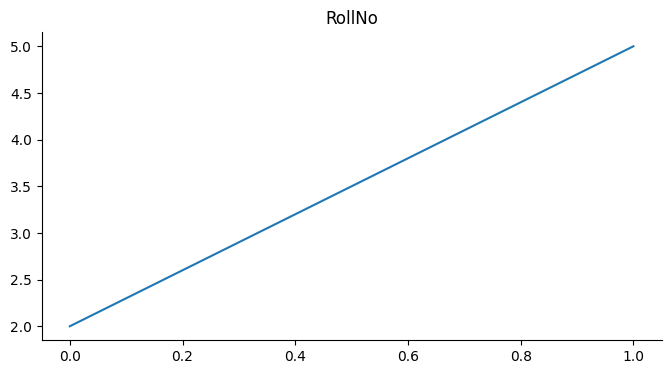

In [14]:
# @title RollNo

from matplotlib import pyplot as plt
df['RollNo'].plot(kind='line', figsize=(8, 4), title='RollNo')
plt.gca().spines[['top', 'right']].set_visible(False)

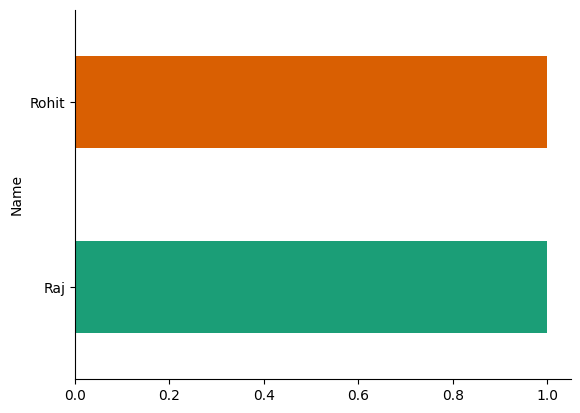

In [13]:
# @title Name

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

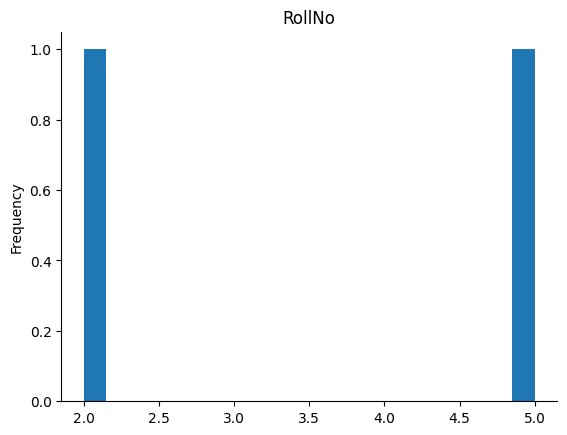

In [12]:
# @title RollNo

from matplotlib import pyplot as plt
df['RollNo'].plot(kind='hist', bins=20, title='RollNo')
plt.gca().spines[['top', 'right',]].set_visible(False)